In [1]:
import pandas
import numpy as np

In [2]:
'''Check for null values in the data. Get the number of null values for each column.'''
#Loading the dataset into the dataframe
gp=pandas.read_csv('/Users/phani/Documents/DataAnalytics/Python/Project/googleplaystore.csv')

gp.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
#Checking and counting the number of null values
gp.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [4]:
#Drop records with nulls in any of the columns. 
gp.dropna(inplace=True)

In [5]:
#Checking again the count of null values
gp.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

# Data Cleaning

In [6]:
'''Variables seem to have incorrect type and inconsistent formatting. You need to fix them: 

Size column has sizes in Kb as well as Mb. To analyze, you’ll need to convert these to numeric.

Extract the numeric value from the column

Multiply the value by 1,000, if size is mentioned in Mb'''

#Checking the datatypes
gp.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [7]:
'''Size column has sizes in Kb as well as Mb. To analyze, you’ll need to convert these to numeric.

Extract the numeric value from the column

Multiply the value by 1,000, if size is mentioned in Mb'''

# size_col method is defined to remove k,M in the size column and converting them to bytes.

def change_size(size):
    if 'M' in size:
        x = size[:-1]
        x = float(x)*1000000
        return(x)
    elif 'k' == size[-1:]:
        x = size[:-1]
        x = float(x)*1000
        return(x)
    elif size.startswith('Varies'):
        return np.nan
    
    else:
        return x
    
#calling the function

gp['Size']=gp['Size'].map(change_size)  



In [8]:
#Converting the size column to float datatype
gp['Size']=gp['Size'].astype(float)
gp['Size']

#filling Size which had NA
gp.Size.fillna(method = 'ffill', inplace = True)

gp['Size']

0        19000000.0
1        14000000.0
2         8700000.0
3        25000000.0
4         2800000.0
            ...    
10834     2600000.0
10836    53000000.0
10837     3600000.0
10839     3600000.0
10840    19000000.0
Name: Size, Length: 9360, dtype: float64

In [9]:
'''Reviews is a numeric field that is loaded as a string field. 
Convert it to numeric (int/float).'''


#changing the object datatype of Reviews to float
print("### changing the datatype of Reviews column from object to float")
gp['Reviews']=gp['Reviews'].astype(float)
gp['Reviews']

### changing the datatype of Reviews column from object to float


0           159.0
1           967.0
2         87510.0
3        215644.0
4           967.0
           ...   
10834         7.0
10836        38.0
10837         4.0
10839       114.0
10840    398307.0
Name: Reviews, Length: 9360, dtype: float64

In [10]:
'''Installs field is currently stored as string and has values like 1,000,000+. 

Treat 1,000,000+ as 1,000,000

remove ‘+’, ‘,’ from the field, convert it to integer'''

#Replacing '+' and ',' sign with a space in Installs column
gp['Installs']=gp['Installs'].astype(str).str.replace('+','')
gp['Installs']=gp['Installs'].map(lambda x: ''.join(x.split(',')))

#Converting Installs object datatype to float datatype
gp['Installs']=gp['Installs'].astype(float)
gp['Installs']

<ipython-input-10-0bf82bc1d224>:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  gp['Installs']=gp['Installs'].astype(str).str.replace('+','')


0           10000.0
1          500000.0
2         5000000.0
3        50000000.0
4          100000.0
            ...    
10834         500.0
10836        5000.0
10837         100.0
10839        1000.0
10840    10000000.0
Name: Installs, Length: 9360, dtype: float64

In [11]:
#Price field is a string and has $ symbol. Remove ‘$’ sign, and convert it to numeric.

print('####First removing the $ symbol and Everyone in the price column##### \n \t')
remove_char=['$','Everyone']
for i in remove_char:
    if i=='$':
        gp['Price']=gp['Price'].astype(str).str.replace(i,'')
    if i.startswith('Everyone'):
        gp['Price']=gp['Price'].astype(str).str.replace(i,'')

#Converting Price column to float datatype        
gp['Price']=gp['Price'].astype(float)
gp['Price']

####First removing the $ symbol and Everyone in the price column##### 
 	


<ipython-input-11-5f1dc933f5dc>:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  gp['Price']=gp['Price'].astype(str).str.replace(i,'')


0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10834    0.0
10836    0.0
10837    0.0
10839    0.0
10840    0.0
Name: Price, Length: 9360, dtype: float64

In [12]:
#Converting Type classification into binary
def type_cat(types):
    if types == 'Free':
        return 0
    else:
        return 1

gp['Type'] = gp['Type'].map(type_cat)

print("***** converting Type classification into binary ***** \n\t")
gp['Type']

***** converting Type classification into binary ***** 
	


0        0
1        0
2        0
3        0
4        0
        ..
10834    0
10836    0
10837    0
10839    0
10840    0
Name: Type, Length: 9360, dtype: int64

# Sanity Checks

In [54]:
'''Sanity checks:

Average rating should be between 1 and 5 as only these values are allowed on the play store. 
Drop the rows that have a value outside this range.

'''
#Checking the average Rating lies between 1 and 5
r=((gp['Rating'].mean()>=1)&(gp['Rating'].mean()<=5))
print("The average Rating lies between 1 and 5 ",r)

print("***** All Rating records are between 1 and 5 ***** \n\t")


The average Rating lies between 1 and 5  True
***** All Rating records are between 1 and 5 ***** 
	


In [14]:
'''Reviews should not be more than installs as only those who installed can review the app. 
If there are any such records, drop them.'''

print('###Before Dropping the rows where reviews are greater than Installs \n\t')
gp[['Reviews','Installs']]



###Before Dropping the rows where reviews are greater than Installs 
	


,Reviews,Installs
0,159.0,10000.0
1,967.0,500000.0
2,87510.0,5000000.0
3,215644.0,50000000.0
4,967.0,100000.0
...,...,...
10834,7.0,500.0
10836,38.0,5000.0
10837,4.0,100.0
10839,114.0,1000.0


In [15]:
#checking which rows have the Reviews greater than Installs

ri=gp[(gp['Reviews'])>(gp['Installs'])]
print("***** Reviews greater than Installs ***** \n\t")
ri

***** Reviews greater than Installs ***** 
	


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4.0,25000000.0,1.0,0,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249.0,30000000.0,10000.0,1,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2.0,20000000.0,1.0,1,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7.0,19000000.0,5.0,0,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11.0,6100000.0,10.0,0,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20.0,4200000.0,10.0,0,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2.0,16000000.0,1.0,1,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


In [16]:
# dropping the rows of Reviews which is greater than Installs

print("#### After Dropping the rows \n\t")
gp=gp.drop(gp.index[[2454, 4663, 5917, 6700, 7402, 8591]])
gp

#### After Dropping the rows 
	


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000000.0,10000.0,0,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000000.0,500000.0,0,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8700000.0,5000000.0,0,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000000.0,50000000.0,0,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2800000.0,100000.0,0,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7.0,2600000.0,500.0,0,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,53000000.0,5000.0,0,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3600000.0,100.0,0,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,3600000.0,1000.0,0,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [17]:
'''For free apps (type = “Free”), the price should not be >0. Drop any such rows.'''

gp2=gp[['Type','Price']]

#Searching for the rows where Type=Free and Price>0

print("***** The number of rows where Type = Free and Price > 0 ")
np.sum((gp2['Type']=='0')& ((gp2['Price']) > 0))

***** The number of rows where Type = Free and Price > 0 


0

In [18]:
gp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9354 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9354 non-null   object 
 1   Category        9354 non-null   object 
 2   Rating          9354 non-null   float64
 3   Reviews         9354 non-null   float64
 4   Size            9354 non-null   float64
 5   Installs        9354 non-null   float64
 6   Type            9354 non-null   int64  
 7   Price           9354 non-null   float64
 8   Content Rating  9354 non-null   object 
 9   Genres          9354 non-null   object 
 10  Last Updated    9354 non-null   object 
 11  Current Ver     9354 non-null   object 
 12  Android Ver     9354 non-null   object 
dtypes: float64(5), int64(1), object(7)
memory usage: 1023.1+ KB


# Performing univariate analysis

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

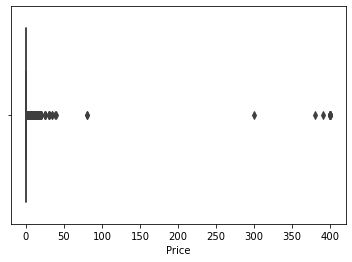

In [19]:
'''Performing univariate analysis: 

Boxplot for Price: Are there any outliers? Think about the price of usual apps on Play Store.

'''

import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(gp.Price) 

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Reviews'>

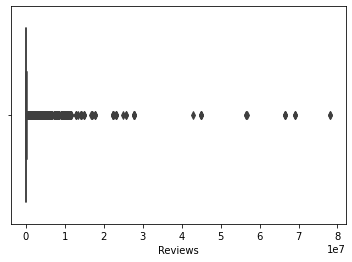

In [20]:
'''Boxplot for Reviews
Are there any apps with very high number of reviews? Do the values seem right?'''

sns.boxplot(gp.Reviews) # Yes, there are some reviews are high in number.



<AxesSubplot:ylabel='Frequency'>

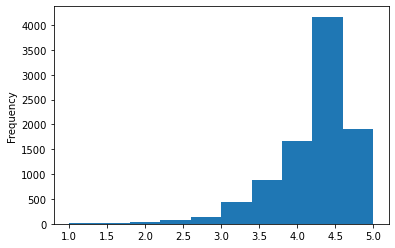

In [21]:
'''Histogram for Rating
How are the ratings distributed? Is it more toward higher ratings?'''

gp.Rating.plot.hist() # Yes, the ratings are towards higher range


<AxesSubplot:ylabel='Frequency'>

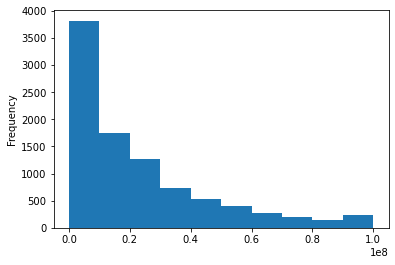

In [22]:
'''Histogram for Size 
'''

gp.Size.plot.hist() 



# Outlier Treatment

In [23]:
'''Outlier treatment: 

Price: From the box plot, it seems like there are some apps with very high price. 
A price of $200 for an application on the Play Store is very high and suspicious!

Check out the records with very high price

Is 200 indeed a high price?

Drop these as most seem to be junk apps'''

#Before Dropping the price >200 records

print('***** Before Dropping the price >200 records \n\t')
print("***** Checking the price > $200 records ***** \n\t")

p=gp[gp['Price']>200.0]

p


***** Before Dropping the price >200 records 
	
***** Checking the price > $200 records ***** 
	


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6.0,1500000.0,100.0,1,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718.0,26000000.0,10000.0,1,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275.0,7300000.0,10000.0,1,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547.0,1800000.0,100000.0,1,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856.0,8700000.0,10000.0,1,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411.0,2600000.0,10000.0,1,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867.0,4700000.0,50000.0,1,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41.0,2900000.0,1000.0,1,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93.0,22000000.0,1000.0,1,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472.0,965000.0,5000.0,1,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


In [24]:
''' Dropping the 15 records whose price is greater than $200.0'''

print("**** Storing the indexes to be dropped into a variable as a list **** \n\t")
indexes_drop=list(p.index)
gp=gp.drop(list(indexes_drop))
print("*** After Dropping the records whose price is greater than $200.0 ****\n\t")
gp

**** Storing the indexes to be dropped into a variable as a list **** 
	
*** After Dropping the records whose price is greater than $200.0 ****
	


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000000.0,10000.0,0,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000000.0,500000.0,0,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8700000.0,5000000.0,0,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000000.0,50000000.0,0,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2800000.0,100000.0,0,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7.0,2600000.0,500.0,0,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,53000000.0,5000.0,0,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3600000.0,100.0,0,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,3600000.0,1000.0,0,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [25]:
'''Reviews: Very few apps have very high number of reviews. 
These are all star apps that don’t help with the analysis and, in fact, will skew it. 
Drop records having more than 2 million reviews.'''

print("*** Extracting the number of reviews greater than 2 Million ***** \n\t")
r=gp[gp['Reviews']>2000000]
r



*** Extracting the number of reviews greater than 2 Million ***** 
	


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
139,Wattpad 📖 Free Books,BOOKS_AND_REFERENCE,4.6,2914724.0,3100000.0,1.000000e+08,0,0.0,Teen,Books & Reference,"August 1, 2018",Varies with device,Varies with device
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847.0,35000000.0,1.000000e+09,0,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316.0,35000000.0,1.000000e+09,0,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995.0,17000000.0,1.000000e+09,0,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
340,Gmail,COMMUNICATION,4.3,4604324.0,17000000.0,1.000000e+09,0,0.0,Everyone,Communication,"August 2, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9166,Modern Combat 5: eSports FPS,GAME,4.3,2903386.0,58000000.0,1.000000e+08,0,0.0,Mature 17+,Action,"July 24, 2018",3.2.1c,4.0 and up
9841,Google Earth,TRAVEL_AND_LOCAL,4.3,2339098.0,63000000.0,1.000000e+08,0,0.0,Everyone,Travel & Local,"June 18, 2018",9.2.17.13,4.1 and up
10186,Farm Heroes Saga,FAMILY,4.4,7615646.0,71000000.0,1.000000e+08,0,0.0,Everyone,Casual,"August 7, 2018",5.2.6,2.3 and up
10190,Fallout Shelter,FAMILY,4.6,2721923.0,25000000.0,1.000000e+07,0,0.0,Teen,Simulation,"June 11, 2018",1.13.12,4.1 and up


In [26]:
#Dropping records having more than 2 million reviews.

print("**** Storing the indexes to be dropped into a variable as a list **** \n\t")
indexes_drop=list(r.index)
gp=gp.drop(list(indexes_drop))
print("*** Dropping the records having more than 2 million reviews ****\n\t")
gp

**** Storing the indexes to be dropped into a variable as a list **** 
	
*** Dropping the records having more than 2 million reviews ****
	


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000000.0,10000.0,0,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000000.0,500000.0,0,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8700000.0,5000000.0,0,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000000.0,50000000.0,0,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2800000.0,100000.0,0,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7.0,2600000.0,500.0,0,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,53000000.0,5000.0,0,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3600000.0,100.0,0,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,3600000.0,1000.0,0,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [27]:
'''Installs:  There seems to be some outliers in this field too. 
Apps having very high number of installs should be dropped from the analysis.

Find out the different percentiles – 10, 25, 50, 70, 90, 95, 99

Decide a threshold as cutoff for outlier and drop records having values more than that

'''
'''Outlier Treatment for Installs'''

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

print(gp.Installs.quantile([0.1,0.25,0.5,0.7,0.9,0.95,0.99])) 

print("There are 1 % of records having Installs 100M and more. We need to skew them. \n\t")





0.10         1000.0
0.25        10000.0
0.50       500000.0
0.70      1000000.0
0.90     10000000.0
0.95     10000000.0
0.99    100000000.0
Name: Installs, dtype: float64
There are 1 % of records having Installs 100M and more. We need to skew them. 
	


In [28]:
len(gp[gp['Installs']>=100000000])

142

In [29]:
print("**** After outliers removed **** \n\t")
gp=gp[gp['Installs']<100000000].copy()
gp.shape

**** After outliers removed **** 
	


(8744, 13)

In [30]:
gp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8744 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8744 non-null   object 
 1   Category        8744 non-null   object 
 2   Rating          8744 non-null   float64
 3   Reviews         8744 non-null   float64
 4   Size            8744 non-null   float64
 5   Installs        8744 non-null   float64
 6   Type            8744 non-null   int64  
 7   Price           8744 non-null   float64
 8   Content Rating  8744 non-null   object 
 9   Genres          8744 non-null   object 
 10  Last Updated    8744 non-null   object 
 11  Current Ver     8744 non-null   object 
 12  Android Ver     8744 non-null   object 
dtypes: float64(5), int64(1), object(7)
memory usage: 956.4+ KB


# Bi-Variate Analysis

**** As Rating increase price also increases **** 
	


Text(0, 0.5, 'Price')

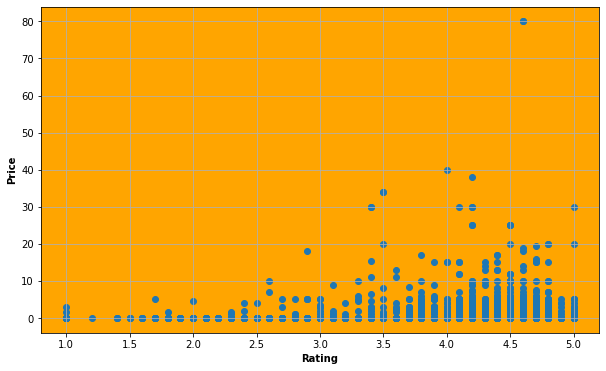

In [31]:
'''Bivariate analysis: Let’s look at how the available predictors relate to the 
variable of interest, i.e., our target variable rating. 
Make scatter plots (for numeric features) and 
box plots (for character features) to assess the relations between 
rating and the other features.

Make scatter plot/joinplot for Rating vs. Price

What pattern do you observe? Does rating increase with price?'''

print("**** As Rating increase price also increases **** \n\t")
fig = plt.subplots(figsize=(10, 6))
ax=plt.axes()
ax.set_facecolor("orange")
plt.scatter(gp.Rating,gp.Price)
plt.grid(True)
plt.xlabel("Rating",fontweight='bold')
plt.ylabel("Price",fontweight='bold')



[Text(0.5, 1.0, 'Rating Vs Size'),
 Text(0.5, 0, 'Rating'),
 Text(0, 0.5, 'Size')]

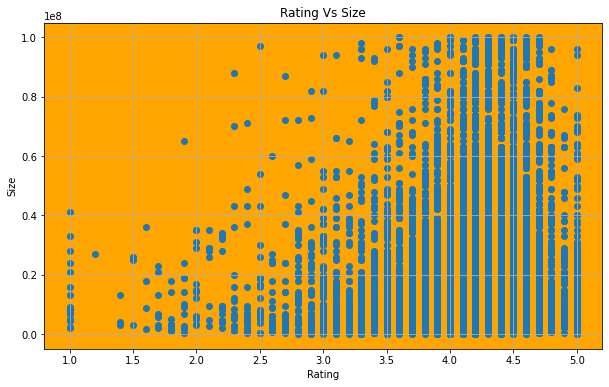

In [32]:
'''Make scatter plot/joinplot for Rating vs. Size

Are heavier apps rated better?'''

fig = plt.subplots(figsize=(10, 6))
ax=plt.axes()
plt.scatter(gp.Rating,gp.Size) 
ax.set_facecolor("orange")
plt.grid(True)
ax.set(title='Rating Vs Size',xlabel='Rating',ylabel='Size')



[Text(0.5, 1.0, 'Rating Vs Reviews'),
 Text(0.5, 0, 'Rating'),
 Text(0, 0.5, 'Reviews')]

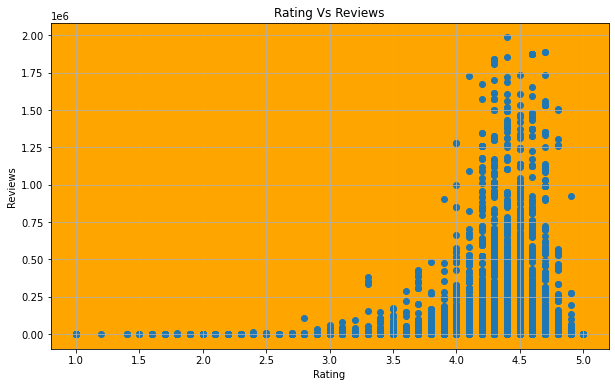

In [33]:
'''Make scatter plot/joinplot for Rating vs. Reviews

Does more review mean a better rating always?

'''

fig = plt.subplots(figsize=(10, 6))
ax=plt.axes()
plt.scatter(gp.Rating,gp.Reviews) 
ax.set_facecolor("orange")
plt.grid(True)
ax.set(title='Rating Vs Reviews',xlabel='Rating',ylabel='Reviews')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rating', ylabel='Content Rating'>

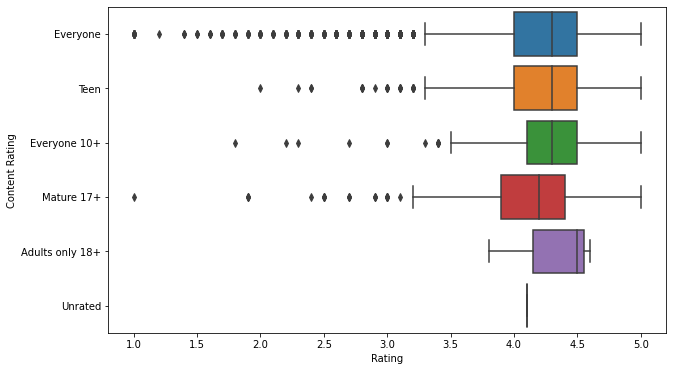

In [34]:
'''Make boxplot for Rating vs. Content Rating

Is there any difference in the ratings? Are some types liked better?'''

fig = plt.subplots(figsize=(10, 6))
sns.boxplot(gp['Rating'],gp['Content Rating'])

In [35]:
category_val=gp['Category'].unique()
category_dict={}
for i in range(0,len(category_val)):
    category_dict[category_val[i]]=i

gp['Category_c']=gp['Category'].map(category_dict).astype(int) 
gp['Category_c']

0         0
1         0
2         0
3         0
4         0
         ..
10834    18
10836    18
10837    18
10839     3
10840    16
Name: Category_c, Length: 8744, dtype: int64

In [36]:
genre_val=gp['Genres'].unique()
genre_dict={}
for i in range(0,len(genre_val)):
    genre_dict[genre_val[i]]=i
gp['Genres_c']=gp['Genres'].map(genre_dict).astype(int)
gp['Genres_c']

0         0
1         1
2         0
3         0
4         2
         ..
10834    11
10836    11
10837    11
10839     5
10840    28
Name: Genres_c, Length: 8744, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'ART_AND_DESIGN'),
  Text(1, 0, 'AUTO_AND_VEHICLES'),
  Text(2, 0, 'BEAUTY'),
  Text(3, 0, 'BOOKS_AND_REFERENCE'),
  Text(4, 0, 'BUSINESS'),
  Text(5, 0, 'COMICS'),
  Text(6, 0, 'COMMUNICATION'),
  Text(7, 0, 'DATING'),
  Text(8, 0, 'EDUCATION'),
  Text(9, 0, 'ENTERTAINMENT'),
  Text(10, 0, 'EVENTS'),
  Text(11, 0, 'FINANCE'),
  Text(12, 0, 'FOOD_AND_DRINK'),
  Text(13, 0, 'HEALTH_AND_FITNESS'),
  Text(14, 0, 'HOUSE_AND_HOME'),
  Text(15, 0, 'LIBRARIES_AND_DEMO'),
  Text(16, 0, 'LIFESTYLE'),
  Text(17, 0, 'GAME'),
  Text(18, 0, 'FAMILY'),
  Text(19, 0, 'MEDICAL'),
  Text(20, 0, 'SOCIAL'),
  Text(21, 0, 'SHOPPING'),
  Text(22, 0, 'PHOTOGRAPHY'),
  Text(23, 0, 'SPORTS'),
  Text(24, 0, 'TRAVEL_AND_LOCAL'),
  Text(25, 0, 'TOOLS'),
  Text(26, 0, 'PERSONALIZATION'),
  Text(27, 0, 'PRODUCTIVITY'),
  Text(28, 0, 'PARENTING'),
  Text(

<Figure size 1296x432 with 0 Axes>

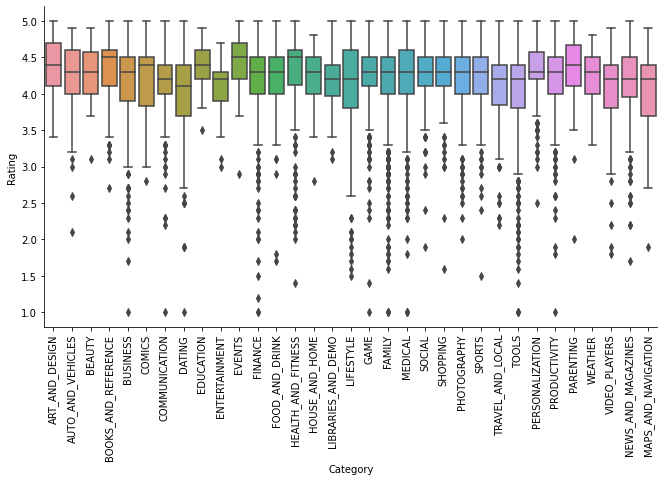

In [37]:
'''Make boxplot for Ratings vs. Category

Which genre has the best ratings?'''

plt.figure(figsize=[18,6])
box=sns.catplot(x="Category",y="Rating",kind="box",data=gp,aspect=20/10)
plt.xticks(rotation=90)



# Data preprocessing

In [38]:
'''Created a copy of gp dataframe'''
inp1=gp.copy()
inp1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Category_c,Genres_c
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000000.0,10000.0,0,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,0,0
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000000.0,500000.0,0,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0,1
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8700000.0,5000000.0,0,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,0,0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000000.0,50000000.0,0,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,0,0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2800000.0,100000.0,0,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,0,2


In [39]:
'''Reviews and Install have some values that are still relatively very high. 
Before building a linear regression model, you need to reduce the skew. 
Apply log transformation (np.log1p) to Reviews and Installs.'''

gp.Installs.describe()


count    8.744000e+03
mean     3.480565e+06
std      8.644847e+06
min      1.000000e+00
25%      1.000000e+04
50%      1.000000e+05
75%      5.000000e+06
max      5.000000e+07
Name: Installs, dtype: float64

In [40]:
inp1.Installs=inp1.Installs.apply(np.log1p)
inp1.Reviews=inp1.Reviews.apply(np.log1p)
inp1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Category_c,Genres_c
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,5.075174,19000000.0,9.210440,0,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,0,0
1,Coloring book moana,ART_AND_DESIGN,3.9,6.875232,14000000.0,13.122365,0,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0,1
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,11.379520,8700000.0,15.424949,0,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,0,0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,12.281389,25000000.0,17.727534,0,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,0,0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,6.875232,2800000.0,11.512935,0,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,0,2


In [41]:
inp1.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Category_c', 'Genres_c'],
      dtype='object')

Drop columns App, Last Updated, Current Ver, and Android Ver. These variables are not useful for our task.

In [42]:
inp1.drop(['App','Last Updated','Current Ver','Android Ver'],axis=1,inplace=True)

In [43]:
inp1.shape

(8744, 11)

Get dummy columns for Category, Genres, and Content Rating. This needs to be done as the models do not understand categorical data, and all data should be numeric. Dummy encoding is one way to convert character fields to numeric. Name of dataframe should be inp2.

In [44]:
inp2=pandas.get_dummies(inp1,drop_first=True)

In [56]:
inp2.head()

,Rating,Reviews,Size,Installs,Type,Price,Category_c,Genres_c,Category_AUTO_AND_VEHICLES,Category_BEAUTY,...,Genres_Tools,Genres_Tools;Education,Genres_Travel & Local,Genres_Travel & Local;Action & Adventure,Genres_Trivia,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word
0,4.1,5.075174,19000000.0,9.210440,0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.9,6.875232,14000000.0,13.122365,0,0.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.7,11.379520,8700000.0,15.424949,0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.5,12.281389,25000000.0,17.727534,0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.3,6.875232,2800000.0,11.512935,0,0.0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0


# Train test Split

Train test split  and apply 70-30 split. 

In [46]:
# Dropping the rating column and assign it to x variable
x=inp2.drop('Rating',axis=1)
x

,Reviews,Size,Installs,Type,Price,Category_c,Genres_c,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,...,Genres_Tools,Genres_Tools;Education,Genres_Travel & Local,Genres_Travel & Local;Action & Adventure,Genres_Trivia,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word
0,5.075174,19000000.0,9.210440,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6.875232,14000000.0,13.122365,0,0.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,11.379520,8700000.0,15.424949,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,12.281389,25000000.0,17.727534,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6.875232,2800000.0,11.512935,0,0.0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,2.079442,2600000.0,6.216606,0,0.0,18,11,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10836,3.663562,53000000.0,8.517393,0,0.0,18,11,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10837,1.609438,3600000.0,4.615121,0,0.0,18,11,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10839,4.744932,3600000.0,6.908755,0,0.0,3,5,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [57]:
from sklearn.model_selection import train_test_split

print("****Splitting the dataset to 70-30 ***** \n\t")
x_train,x_test,y_train,y_test=train_test_split(x,inp2.Rating,train_size=0.7,random_state=4)
print("Train split of x ",x_train.shape)
print("Test split of x ",x_test.shape)
print("Train split of y ",y_train.shape)
print("Test split of y ",y_test.shape)

****Splitting the dataset to 70-30 ***** 
	
Train split of x  (6120, 158)
Test split of x  (2624, 158)
Train split of y  (6120,)
Test split of y  (2624,)


# Model Building

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

print("****Model Building***** \n\t")
model=LinearRegression()
model.fit(x_train,y_train)
pv_test=model.predict(x_test)
pv_train=model.predict(x_train)

print("Predicted value for test ",len(pv_test))
print("Predicted value for train ",len(pv_train))

****Model Building***** 
	
Predicted value for test  2624
Predicted value for train  6120


In [59]:
from sklearn.metrics import r2_score

print("**** Printing r2 score **** \n\t")
print("r2_score for test split ",r2_score(y_test,pv_test))
print("r_score for train split ",r2_score(y_train,pv_train))


**** Printing r2 score **** 
	
r2_score for test split  0.1458725401204657
r_score for train split  0.1632088123061054


****Displaying the Predicted and actual ratings in Sctterplot **** 
	


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Predicted Vs Actual Ratings')

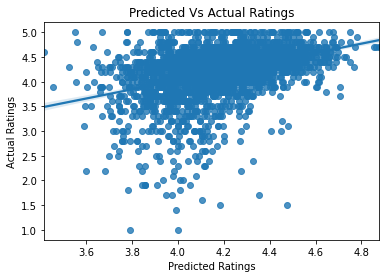

In [60]:

print("****Displaying the Predicted and actual ratings in Sctterplot **** \n\t")

sns.regplot(pv_test,y_test)
plt.xlabel("Predicted Ratings")
plt.ylabel("Actual Ratings")
plt.title("Predicted Vs Actual Ratings")